In [1]:
import os
import re
import cv2 as cv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
def apply_mask(image, mask):
    masked_image = cv.bitwise_and(image, image, mask=mask)
    return masked_image

def apply_gaussian_blur(image, kernel_size):
    blurred_image = cv.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

In [3]:
col_frames=os.listdir('Dataset/frames3')
col_frames.sort(key=lambda f: int(re.sub('\D','',f)))

col_images=[]
for i in tqdm(col_frames):
    img=cv.imread('Dataset/frames3/'+i)
    col_images.append(img)

100%|████████████████████████████████████████| 681/681 [00:04<00:00, 143.39it/s]


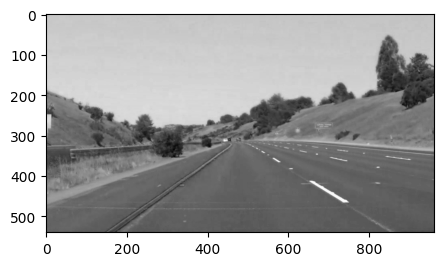

In [4]:
idx=670
plt.figure(figsize=(5,5))
plt.imshow(col_images[idx][:,:,0],cmap='gray')
plt.show()

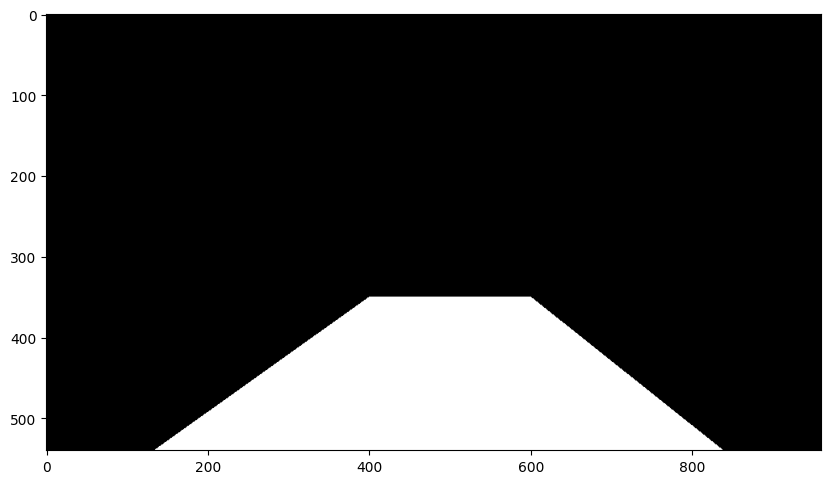

In [5]:
mask=np.zeros_like(col_images[idx][:,:,0])

polygon = np.array([[[120,550], [400,350], [600,350], [850,550]]])
cv.fillConvexPoly(mask,polygon,1)
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap= "gray")
plt.show()

100%|████████████████████████████████████████| 681/681 [00:04<00:00, 153.85it/s]


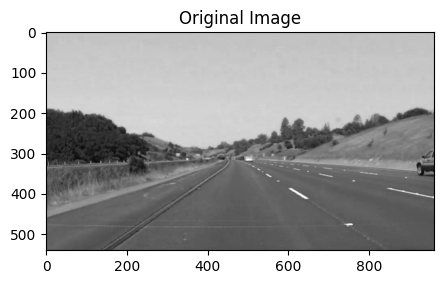

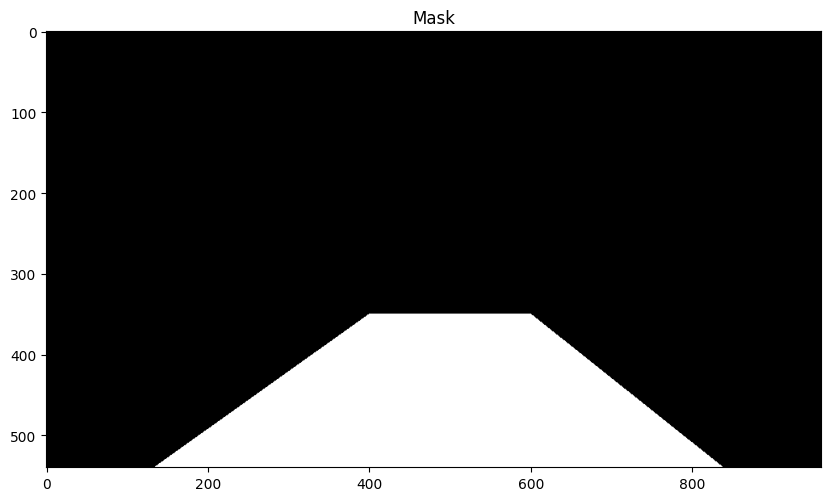

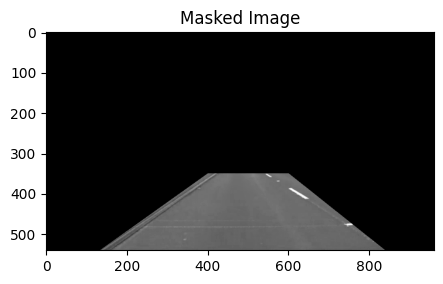

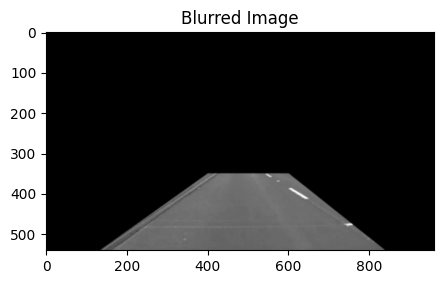

In [6]:
import cv2

col_frames = os.listdir('Dataset/frames3')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

col_images = []
for i in tqdm(col_frames):
    img = cv2.imread('Dataset/frames3/' + i)
    col_images.append(img)

idx = 333
plt.figure(figsize=(5, 5))
plt.imshow(col_images[idx][:, :, 0], cmap='gray')
plt.title("Original Image")
plt.show()

mask = np.zeros_like(col_images[idx][:, :, 0])
polygon = np.array([[120,550], [400,350], [600,350], [850,550]])
cv2.fillConvexPoly(mask, polygon, 1)

plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.show()

masked_image = cv2.bitwise_and(col_images[idx][:, :, 0], col_images[idx][:, :, 0], mask=mask)

plt.figure(figsize=(5, 5))
plt.imshow(masked_image, cmap='gray')
plt.title("Masked Image")
plt.show()

kernel_size = 5
blurred_image = cv2.GaussianBlur(masked_image, (kernel_size, kernel_size), 0)

plt.figure(figsize=(5, 5))
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.show()

In [7]:
# img = cv.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=mask)

# plt.figure(figsize=(10,10))
# plt.imshow(img, cmap= "gray")
# plt.show()

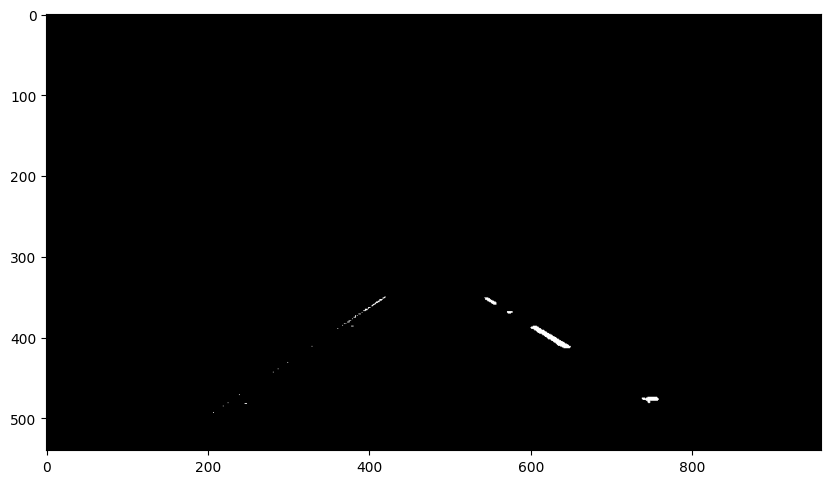

In [8]:
ret, thresh = cv.threshold(masked_image, 145, 160, cv.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

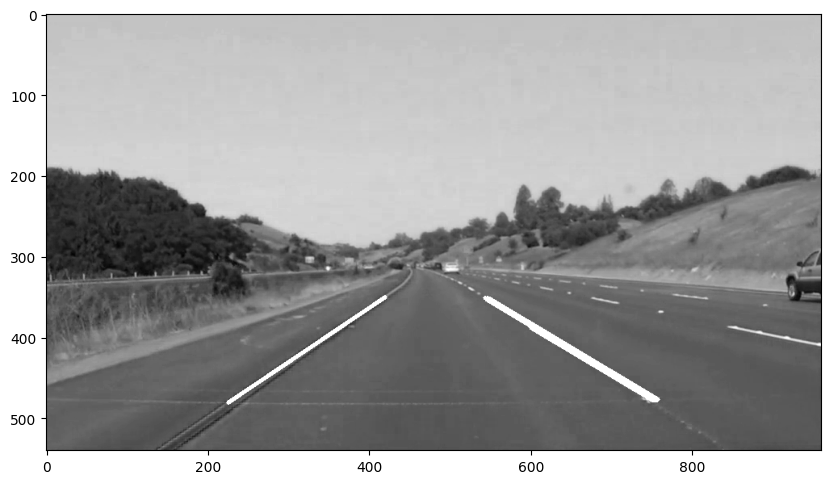

In [9]:
lines = cv.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
dmy = col_images[idx][:,:,0].copy()

for line in lines:
  x1, y1, x2, y2 = line[0]
  cv.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [10]:
cnt = 0

for img in tqdm(col_images):
  masked = cv.bitwise_and(img[:,:,0], img[:,:,0], mask=mask)
  ret, thresh = cv.threshold(masked, 130, 145, cv.THRESH_BINARY)
  lines = cv.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
  
    cv.imwrite('Detected/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv.imwrite('Detected/'+str(cnt)+'.png',img)

  cnt+= 1

100%|█████████████████████████████████████████| 681/681 [00:12<00:00, 55.24it/s]


In [11]:
# import cv2 as cv
# import numpy as np
# from tqdm import tqdm

# cnt = 0

# for img in tqdm(col_images):
#     masked = cv.bitwise_and(img[:, :, 0], img[:, :, 0], mask=mask)
#     ret, thresh = cv.threshold(masked, 130, 145, cv.THRESH_BINARY)
#     lines = cv.HoughLinesP(thresh, 1, np.pi / 180, 30, maxLineGap=200)
#     dmy = img.copy()
#     try:
#         for line in lines:
#             x1, y1, x2, y2 = line[0]
#             cv.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

#         # Create a mask for the region enclosed by lines
#         region_mask = np.zeros_like(dmy[:, :, 0])
#         cv.fillPoly(region_mask, [lines[:, :, :2]], (0, 0, 255))  # Use (0, 0, 255) for blue color

#         # Apply the mask to the original image and color the region
#         dmy = cv.addWeighted(dmy, 1, cv.merge([region_mask, region_mask, region_mask]), 0.5, 0)

#         cv.imwrite('Detected/' + str(cnt) + '.png', dmy)

#     except TypeError:
#         cv.imwrite('Detected/' + str(cnt) + '.png', img)

#     cnt += 1


In [12]:


path_in = 'Detected/'
path_out = 'yolov5/output_video.mp4'
fps = 30.0

image_files = [img for img in os.listdir(path_in) if img.endswith(".png")]

image_files.sort(key=lambda f: float(re.sub('\D', '', f)))

img = cv2.imread(os.path.join(path_in, image_files[0]))
height, width, _ = img.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(path_out, fourcc, fps, (width, height))

for image_file in image_files:
    img_path = os.path.join(path_in, image_file)
    frame = cv2.imread(img_path)
    video_writer.write(frame)

video_writer.release()

print(f"Video created successfully at {path_out}")


Video created successfully at yolov5/output_video.mp4


In [13]:
import subprocess
%cd yolov5
def detect_vehicles(input_video, output_video):
    command = [
        "python",
        "detect.py",
        f"--source {input_video}",
        f"--weights yolov5s.pt",
        "--conf 0.5",
        "--device 0",  
        "--save-txt",   
    ]

    subprocess.run(" ".join(command), shell=True)

    save_path = os.path.splitext(input_video)[0]  
    save_path = f"{save_path}/labels" 

    txt_files = [f for f in os.listdir(save_path) if f.endswith(".txt")]

    cap = cv2.VideoCapture(input_video)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width, height = int(cap.get(3)), int(cap.get(4))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        if not ret:
            break

        frame_name = os.path.join(save_path, f"{i}.txt")

        with open(frame_name, "r") as f:
            lines = f.readlines()
            for line in lines:
                data = line.strip().split()
                x, y, w, h = map(float, data[1:])
                x1, y1, x2, y2 = int((x - w / 2) * width), int((y - h / 2) * height), int((x + w / 2) * width), int(
                    (y + h / 2) * height)

                color = (0, 255, 0)  
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

        video_writer.write(frame)

    video_writer.release()
    cap.release()

if __name__ == "__main__":
    input_video = "output_video.mp4" 
    output_video = "output.mp4" 

    detect_vehicles(input_video, output_video)

/home/sayeb/Documents/Projects/Lane detection/yolov5


detect: weights=['yolov5s.pt'], source=output_video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/home/sayeb/Documents/Projects/Lane': No such file or directory
YOLOv5 🚀 2023-12-11 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (Quadro T1000, 3906MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
video 1/1 (1/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 32.6ms
video 1/1 (2/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.3ms
video 1/1 (3/681) /home/sayeb/Documents/Proje

video 1/1 (73/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.1ms
video 1/1 (74/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 5 cars, 10.0ms
video 1/1 (75/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.1ms
video 1/1 (76/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 4 cars, 10.0ms
video 1/1 (77/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 4 cars, 10.0ms
video 1/1 (78/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 4 cars, 10.0ms
video 1/1 (79/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 4 cars, 10.0ms
video 1/1 (80/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 4 cars, 10.0ms
video 1/1 (81/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x64

video 1/1 (157/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (158/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.1ms
video 1/1 (159/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.1ms
video 1/1 (160/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.0ms
video 1/1 (161/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 1 truck, 10.0ms
video 1/1 (162/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 1 truck, 10.0ms
video 1/1 (163/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.0ms
video 1/1 (164/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.0ms
video 1/1 (165/681) /home/sayeb/Documents/Projects/Lane detection/yolov5

video 1/1 (231/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (232/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (233/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (234/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (235/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (236/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (237/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.0ms
video 1/1 (238/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.0ms
video 1/1 (239/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp

video 1/1 (306/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.1ms
video 1/1 (307/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.1ms
video 1/1 (308/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.1ms
video 1/1 (309/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (310/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (311/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (312/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (313/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (314/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x6

video 1/1 (385/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.1ms
video 1/1 (386/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.1ms
video 1/1 (387/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.3ms
video 1/1 (388/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.1ms
video 1/1 (389/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (390/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (391/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (392/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (393/681) /home/sayeb/Documents/Proj

video 1/1 (461/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.1ms
video 1/1 (462/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (463/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (464/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (465/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (466/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (467/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (468/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (469/6

video 1/1 (541/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.1ms
video 1/1 (542/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.1ms
video 1/1 (543/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (544/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (545/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (546/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (547/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (548/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.0ms
video 1/1 (549/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384

video 1/1 (619/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 1 car, 10.0ms
video 1/1 (620/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (621/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.1ms
video 1/1 (622/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.1ms
video 1/1 (623/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.1ms
video 1/1 (624/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.1ms
video 1/1 (625/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 2 cars, 10.1ms
video 1/1 (626/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4: 384x640 3 cars, 10.0ms
video 1/1 (627/681) /home/sayeb/Documents/Projects/Lane detection/yolov5/output_video.mp4

FileNotFoundError: [Errno 2] No such file or directory: 'output_video/labels'

In [14]:
import cv2

def stack_videos_vertical(video1_path, video2_path, output_path='stacked.mp4'):
    video1 = cv2.VideoCapture(video1_path)
    video2 = cv2.VideoCapture(video2_path)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_video = cv2.VideoWriter(output_path, fourcc, 25, (int(video1.get(3)), int(video1.get(4)) * 2))

    while True:
        ret1, frame1 = video1.read()
        ret2, frame2 = video2.read()

        if not ret1 or not ret2:
            break

        stacked_frame = cv2.vconcat([frame1, frame2])
        output_video.write(stacked_frame)

    video1.release()
    video2.release()
    output_video.release()

stack_videos_vertical('Dataset/yelloleft.mp4', 'yolov5/runs/detect/exp2/output_video.mp4')
